In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')

In [23]:
with open('results/all_results.pkl', 'rb') as file:
    results = pickle.load(file)

print("Results keys:", results.keys())
single_shot_results = results['single_shot']
ar_results = results['auto_regressive']

# Check dimensions
print("Single-shot Results dimensions:", [np.array(x).shape for x in single_shot_results])
print("Auto-regressive Results dimensions:", [np.array(x).shape for x in ar_results])

Results keys: dict_keys(['single_shot', 'auto_regressive'])
Single-shot Results dimensions: [(), (), (), (), (26, 2, 10, 13), (26, 10, 26), (26, 10, 26)]
Auto-regressive Results dimensions: [(), (), (), (), (26, 2, 10, 13), (26, 2, 10, 13), (26, 2, 10, 13)]


In [24]:
def separate_data(data, feature_index=0):
    # Convert to numpy array if not already
    data = np.array(data)
    
    # Assuming the second dimension (index 1) represents the feature (temperature, GHG)
    temperature_data = data[:, feature_index, :, :]

    ghg_data = data[:, 1 - feature_index, :, :]  # Assuming there are only two features
    return temperature_data, ghg_data


In [25]:
# Parse the data for single-shot model
ss_inputs, ss_predictions, ss_targets = results['single_shot'][4], results['single_shot'][5], results['single_shot'][6]
ss_input_temp, ss_input_ghg = separate_data(ss_inputs)

# Convert lists to numpy arrays
ss_inputs = np.array(results['single_shot'][4])
ss_predictions = np.array(results['single_shot'][5])
ss_targets = np.array(results['single_shot'][6])

# Separate the data
ss_input_temp, ss_input_ghg = separate_data(ss_inputs)
ss_pred_temp = ss_predictions[:, :, :13]  # Assuming first 13 features are temperature
ss_pred_ghg = ss_predictions[:, :, 13:]   # Assuming next 13 features are GHG emissions
ss_target_temp = ss_targets[:, :, :13]
ss_target_ghg = ss_targets[:, :, 13:]

# Check the dimensions to ensure everything is correct
print("ss_input_temp shape:", ss_input_temp.shape)
print("ss_input_ghg shape:", ss_input_ghg.shape)
print("ss_pred_temp shape:", ss_pred_temp.shape)
print("ss_pred_ghg shape:", ss_pred_ghg.shape)
print("ss_target_temp shape:", ss_target_temp.shape)
print("ss_target_ghg shape:", ss_target_ghg.shape)

ss_input_temp shape: (26, 10, 13)
ss_input_ghg shape: (26, 10, 13)
ss_pred_temp shape: (26, 10, 13)
ss_pred_ghg shape: (26, 10, 13)
ss_target_temp shape: (26, 10, 13)
ss_target_ghg shape: (26, 10, 13)


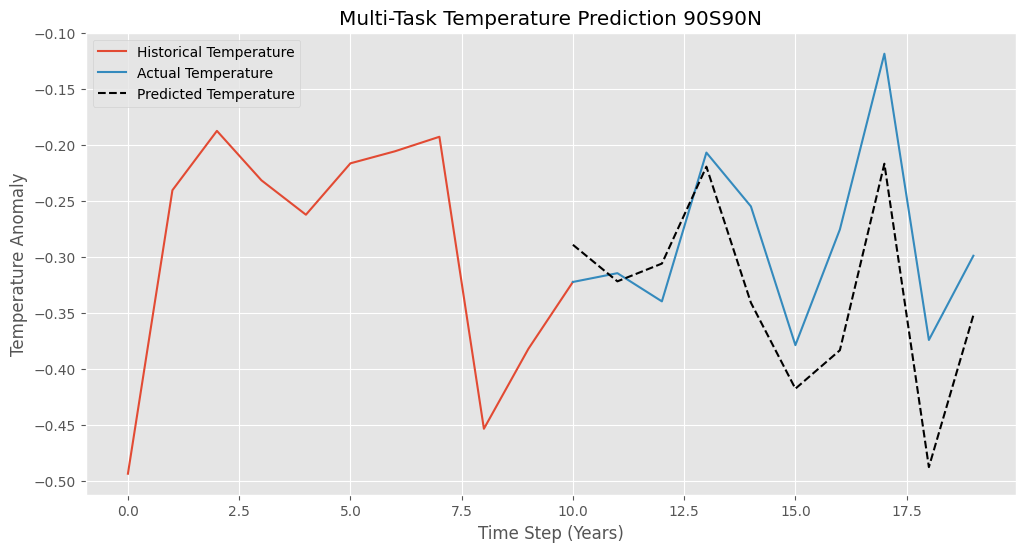

In [38]:
# Set the figure size and style for better clarity and appearance
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')  # Use the 'ggplot' style for a cleaner and more aesthetically pleasing look

# Select a specific sample or location
sample_index = 4
location_index = 1  # Assuming you want to plot for the first location as an example

# Extract data for the selected sample and location
input_sample = ss_input_temp[sample_index, :, location_index]
prediction_sample = ss_pred_temp[sample_index, :, location_index]
target_sample = ss_target_temp[sample_index, :, location_index]

# Define time axes for input, prediction, and target data
time_axis_input = np.arange(len(input_sample))
time_axis_future = np.arange(time_axis_input[-1] + 1, time_axis_input[-1] + 1 + len(target_sample))

# Extend the input time axis and sample to include the first future point for a seamless transition
extended_time_axis_input = np.append(time_axis_input, time_axis_future[0])
extended_input_sample = np.append(input_sample, target_sample[0])

# Plotting
plt.plot(extended_time_axis_input, extended_input_sample, label='Historical Temperature', zorder=1)
plt.plot(time_axis_future, target_sample, label='Actual Temperature', zorder=2)
plt.plot(time_axis_future, prediction_sample, label='Predicted Temperature', linestyle='--', zorder=3, color="black")

# Customize the plot
plt.title('Multi-Task Temperature Prediction 90S90N')
plt.xlabel('Time Step (Years)')
plt.ylabel('Temperature Anomaly')
plt.legend()

# Save the figure if needed
plt.savefig('figures/Multi-Task Prediction (3).pdf')

# Show the plot